`Project Title`    -   Plant Disease Classification

`Technologies`     -   OpenCV(Computer vision) and CNN and Transfer Learning

`Domain`           -   Agriculture


The Dataset consist of 87K RGB images of healthy and diseased leaves.
It is categorised into 38 different classes. We have another 33K images dataset for the testing purpose. 

**Importing Modules**

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow

In [3]:
# Finding the types in the given image dataset.
import os
files = os.listdir(r"C:\Users\mythi\DL\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train")
files

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spid

**Length of classes in train dataset**

In [4]:
len(files)

38

**Reading the files**

In [5]:
import pathlib 
import glob
train_pths = pathlib.Path(r"C:\Users\mythi\DL\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train")
print(train_pths)
train_lst = list(train_pths.glob("*/*.jpg"))
train_lst

C:\Users\mythi\DL\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train


[WindowsPath('C:/Users/mythi/DL/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'),
 WindowsPath('C:/Users/mythi/DL/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.JPG'),
 WindowsPath('C:/Users/mythi/DL/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003_270deg.JPG'),
 WindowsPath('C:/Users/mythi/DL/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003_90deg.JPG'),
 WindowsPath('C:/Users/mythi/DL/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003_new30degFlipLR.JPG'),
 W

**Length of train dataset**

In [6]:
len(train_lst)

70295

**Converting all the files into paths using string function**

In [7]:
train_paths = []
for i in train_lst:
    train_paths.append(str(i))

In [8]:
train_paths

['C:\\Users\\mythi\\DL\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train\\Apple___Apple_scab\\00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG',
 'C:\\Users\\mythi\\DL\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train\\Apple___Apple_scab\\01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.JPG',
 'C:\\Users\\mythi\\DL\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train\\Apple___Apple_scab\\01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003_270deg.JPG',
 'C:\\Users\\mythi\\DL\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train\\Apple___Apple_scab\\01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003_90deg.JPG',
 'C:\\Users\\mythi\\DL\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train\\Apple___Apple_scab\\01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003_new30degFlipLR.JPG',
 'C:\\Users\\mythi\\DL\\New

In [9]:
# Seperating the labels.
import os
train_fldr = []
train_labels = []
for i in train_paths:
    folder_path = os.path.dirname("{}".format(i))
    train_fldr.append(folder_path)
    train_labels.append(os.path.basename(folder_path))

In [10]:
train_fldr

['C:\\Users\\mythi\\DL\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train\\Apple___Apple_scab',
 'C:\\Users\\mythi\\DL\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train\\Apple___Apple_scab',
 'C:\\Users\\mythi\\DL\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train\\Apple___Apple_scab',
 'C:\\Users\\mythi\\DL\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train\\Apple___Apple_scab',
 'C:\\Users\\mythi\\DL\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train\\Apple___Apple_scab',
 'C:\\Users\\mythi\\DL\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train\\Apple___Apple_scab',
 'C:\\Users\\mythi\\DL\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train\\Apple___Apple_scab',
 'C:\\Users\\mythi\\DL\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(

In [11]:
train_labels

['Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___A

In [12]:
# Mapping categorical values to numerical values explicitly.
label = {'Apple___Apple_scab':0,
 'Apple___Black_rot' : 1,
 'Apple___Cedar_apple_rust' : 2,
 'Apple___healthy' : 3,
 'Blueberry___healthy' : 4,
 'Cherry_(including_sour)___healthy' : 5,
 'Cherry_(including_sour)___Powdery_mildew' : 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot' : 7,
 'Corn_(maize)___Common_rust_' : 8,
 'Corn_(maize)___healthy' : 9,
 'Corn_(maize)___Northern_Leaf_Blight' : 10,
 'Grape___Black_rot' : 11,
 'Grape___Esca_(Black_Measles)' :12,
 'Grape___healthy' : 13,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' : 14,
 'Orange___Haunglongbing_(Citrus_greening)' : 15,
 'Peach___Bacterial_spot' : 16,
 'Peach___healthy' : 17,
 'Pepper,_bell___Bacterial_spot' : 18,
 'Pepper,_bell___healthy' : 19,
 'Potato___Early_blight' : 20,
 'Potato___healthy' : 21,
 'Potato___Late_blight' : 22,
 'Raspberry___healthy' : 23,
 'Soybean___healthy' : 24,
 'Squash___Powdery_mildew' : 25,
 'Strawberry___healthy' : 26,
 'Strawberry___Leaf_scorch' : 27,
 'Tomato___Bacterial_spot' : 28,
 'Tomato___Early_blight' : 29,
 'Tomato___healthy' : 30,
 'Tomato___Late_blight' : 31,
 'Tomato___Leaf_Mold' : 32,
 'Tomato___Septoria_leaf_spot' : 33,
 'Tomato___Spider_mites Two-spotted_spider_mite' : 34,
 'Tomato___Target_Spot' : 35,
 'Tomato___Tomato_mosaic_virus' : 36,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus' : 37}
train_label=[]
for i in train_labels:
    i=label[i]
    train_label.append(i)

In [13]:
train_label

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


**DataSet exploration**

**Viewing the image through the path**


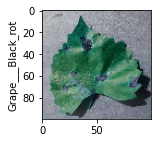

In [20]:
plt.figure(figsize=(2,2))
img=cv2.imread(r"C:\Users\mythi\DL\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train\Grape___Black_rot\1cb9fa90-804f-4b63-9cf7-bab274ab9c5e___FAM_B.Rot 3325.JPG")
img=cv2.resize(img,(100,100))
plt.ylabel(os.path.basename(os.path.dirname(r"C:\Users\mythi\DL\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train\Grape___Black_rot\1cb9fa90-804f-4b63-9cf7-bab274ab9c5e___FAM_B.Rot 3325.JPG")))
plt.imshow(img)

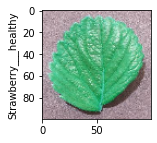

In [21]:
plt.figure(figsize=(2,2))
img=cv2.imread(r"C:\Users\mythi\DL\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train\Strawberry___healthy\1faaac0a-ea12-4085-af35-ab8b70bbf60a___RS_HL 4725.JPG")
img=cv2.resize(img,(100,100))
plt.ylabel(os.path.basename(os.path.dirname(r"C:\Users\mythi\DL\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train\Strawberry___healthy\1faaac0a-ea12-4085-af35-ab8b70bbf60a___RS_HL 4725.JPG")))
plt.imshow(img)

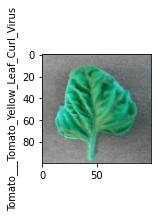

In [22]:
plt.figure(figsize=(2,2))
img=cv2.imread(r"C:\Users\mythi\DL\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train\Tomato___Tomato_Yellow_Leaf_Curl_Virus\36511288-7cbb-4ee0-911f-bb3e341c8f32___UF.GRC_YLCV_Lab 01272.JPG")
img=cv2.resize(img,(100,100))
plt.ylabel(os.path.basename(os.path.dirname(r"C:\Users\mythi\DL\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train\Tomato___Tomato_Yellow_Leaf_Curl_Virus\36511288-7cbb-4ee0-911f-bb3e341c8f32___UF.GRC_YLCV_Lab 01272.JPG")))
plt.imshow(img)

In [13]:
train_data = []
for i in train_paths:
    img = cv2.imread(i)
    img_ = cv2.resize(img, (50,50))
    train_data.append(img_)

In [14]:
train_data

[array([[[197, 164, 168],
         [196, 163, 167],
         [195, 162, 166],
         ...,
         [214, 185, 188],
         [212, 183, 186],
         [214, 185, 188]],
 
        [[200, 167, 171],
         [202, 169, 173],
         [203, 170, 174],
         ...,
         [213, 184, 187],
         [212, 184, 187],
         [208, 179, 182]],
 
        [[198, 165, 169],
         [204, 171, 175],
         [201, 168, 172],
         ...,
         [212, 183, 186],
         [209, 180, 183],
         [209, 180, 183]],
 
        ...,
 
        [[128,  94, 104],
         [124,  90, 100],
         [128,  94, 104],
         ...,
         [133, 106, 122],
         [135, 108, 124],
         [137, 110, 126]],
 
        [[129,  95, 105],
         [131,  97, 107],
         [124,  90, 100],
         ...,
         [137, 110, 126],
         [137, 110, 126],
         [132, 105, 121]],
 
        [[128,  94, 104],
         [120,  86,  96],
         [121,  87,  97],
         ...,
         [132, 105, 121],
  

In [15]:
train_Data = np.array(train_data, dtype='uint8')
train_Labels = np.array(train_label, dtype='uint8')

In [16]:
train_Data.shape

(70295, 50, 50, 3)

 **Loading validation dataset**

In [17]:
# Reading the files.
import pathlib 
import glob
valid_pths = pathlib.Path(r"C:\Users\mythi\DL\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid")
print(valid_pths)
valid_lst = list(valid_pths.glob("*/*.jpg"))
valid_lst

C:\Users\mythi\DL\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid


[WindowsPath('C:/Users/mythi/DL/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335_270deg.JPG'),
 WindowsPath('C:/Users/mythi/DL/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335_90deg.JPG'),
 WindowsPath('C:/Users/mythi/DL/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335_new30degFlipLR.JPG'),
 WindowsPath('C:/Users/mythi/DL/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___Apple_scab/01f3deaa-6143-4b6c-9c22-620a46d8be04___FREC_Scab 3112_270deg.JPG'),
 WindowsPath('C:/Users/mythi/DL/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___Apple_scab/0208f4eb-45a4-4399-904e-989ac2c6257c___FREC_Scab 3037_90

In [18]:
len(valid_lst)

17572

In [19]:
valid_paths = []
for i in valid_lst:
    valid_paths.append(str(i))

In [20]:
valid_paths

['C:\\Users\\mythi\\DL\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid\\Apple___Apple_scab\\00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335_270deg.JPG',
 'C:\\Users\\mythi\\DL\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid\\Apple___Apple_scab\\00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335_90deg.JPG',
 'C:\\Users\\mythi\\DL\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid\\Apple___Apple_scab\\00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335_new30degFlipLR.JPG',
 'C:\\Users\\mythi\\DL\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid\\Apple___Apple_scab\\01f3deaa-6143-4b6c-9c22-620a46d8be04___FREC_Scab 3112_270deg.JPG',
 'C:\\Users\\mythi\\DL\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid\\Apple___Apple_scab\\0208f4eb-45a4-4399-904e-989ac2c6257c___FREC_Scab 3037_90deg.JPG',
 'C:\\Users\\m

In [21]:
# Seperating the labels.
import os
valid_fldr = []
valid_labels = []
for i in valid_paths:
    folder_path = os.path.dirname("{}".format(i))
    valid_fldr.append(folder_path)
    valid_labels.append(os.path.basename(folder_path))

In [22]:
valid_fldr

['C:\\Users\\mythi\\DL\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid\\Apple___Apple_scab',
 'C:\\Users\\mythi\\DL\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid\\Apple___Apple_scab',
 'C:\\Users\\mythi\\DL\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid\\Apple___Apple_scab',
 'C:\\Users\\mythi\\DL\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid\\Apple___Apple_scab',
 'C:\\Users\\mythi\\DL\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid\\Apple___Apple_scab',
 'C:\\Users\\mythi\\DL\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid\\Apple___Apple_scab',
 'C:\\Users\\mythi\\DL\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid\\Apple___Apple_scab',
 'C:\\Users\\mythi\\DL\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(

In [23]:
valid_labels

['Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___A

In [24]:
# Mapping categorical values to numerical values explicitly.
label = {'Apple___Apple_scab':0,
 'Apple___Black_rot' : 1,
 'Apple___Cedar_apple_rust' : 2,
 'Apple___healthy' : 3,
 'Blueberry___healthy' : 4,
 'Cherry_(including_sour)___healthy' : 5,
 'Cherry_(including_sour)___Powdery_mildew' : 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot' : 7,
 'Corn_(maize)___Common_rust_' : 8,
 'Corn_(maize)___healthy' : 9,
 'Corn_(maize)___Northern_Leaf_Blight' : 10,
 'Grape___Black_rot' : 11,
 'Grape___Esca_(Black_Measles)' :12,
 'Grape___healthy' : 13,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' : 14,
 'Orange___Haunglongbing_(Citrus_greening)' : 15,
 'Peach___Bacterial_spot' : 16,
 'Peach___healthy' : 17,
 'Pepper,_bell___Bacterial_spot' : 18,
 'Pepper,_bell___healthy' : 19,
 'Potato___Early_blight' : 20,
 'Potato___healthy' : 21,
 'Potato___Late_blight' : 22,
 'Raspberry___healthy' : 23,
 'Soybean___healthy' : 24,
 'Squash___Powdery_mildew' : 25,
 'Strawberry___healthy' : 26,
 'Strawberry___Leaf_scorch' : 27,
 'Tomato___Bacterial_spot' : 28,
 'Tomato___Early_blight' : 29,
 'Tomato___healthy' : 30,
 'Tomato___Late_blight' : 31,
 'Tomato___Leaf_Mold' : 32,
 'Tomato___Septoria_leaf_spot' : 33,
 'Tomato___Spider_mites Two-spotted_spider_mite' : 34,
 'Tomato___Target_Spot' : 35,
 'Tomato___Tomato_mosaic_virus' : 36,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus' : 37}
valid_label=[]
for i in valid_labels:
    i=label[i]
    valid_label.append(i)

In [25]:
valid_label

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


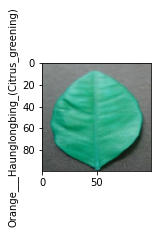

In [23]:
plt.figure(figsize=(2,2))
img=cv2.imread(r"C:\Users\mythi\DL\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid\Orange___Haunglongbing_(Citrus_greening)\3410fd4a-b398-44c9-acc0-0fed4740ca3b___UF.Citrus_HLB_Lab 1051.JPG")
img=cv2.resize(img,(100,100))
plt.ylabel(os.path.basename(os.path.dirname(r"C:\Users\mythi\DL\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid\Orange___Haunglongbing_(Citrus_greening)\3410fd4a-b398-44c9-acc0-0fed4740ca3b___UF.Citrus_HLB_Lab 1051.JPG")))
plt.imshow(img)

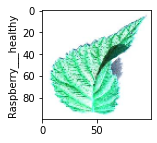

In [24]:
plt.figure(figsize=(2,2))
img=cv2.imread(r"C:\Users\mythi\DL\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid\Raspberry___healthy\8eef072d-0f99-4ba4-9003-249f5395d6f5___Mary_HL 6400_newPixel25.JPG")
img=cv2.resize(img,(100,100))
plt.ylabel(os.path.basename(os.path.dirname(r"C:\Users\mythi\DL\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid\Raspberry___healthy\8eef072d-0f99-4ba4-9003-249f5395d6f5___Mary_HL 6400_newPixel25.JPG")))
plt.imshow(img)

In [26]:
valid_data = []
for i in valid_paths:
    img = cv2.imread(i)
    img_ = cv2.resize(img, (50,50))
    valid_data.append(img_)

In [27]:
valid_data

[array([[[121,  94, 103],
         [130,  95, 105],
         [131,  97, 107],
         ...,
         [200, 167, 171],
         [199, 166, 170],
         [196, 163, 167]],
 
        [[116,  89,  98],
         [133,  97, 107],
         [126,  93, 103],
         ...,
         [199, 166, 170],
         [202, 169, 173],
         [195, 162, 166]],
 
        [[114,  87,  96],
         [124,  89,  99],
         [125,  91, 101],
         ...,
         [199, 166, 170],
         [206, 173, 177],
         [194, 161, 165]],
 
        ...,
 
        [[129, 108, 123],
         [135, 106, 122],
         [134, 107, 123],
         ...,
         [211, 180, 183],
         [213, 182, 185],
         [212, 181, 184]],
 
        [[126, 105, 120],
         [137, 108, 124],
         [140, 113, 129],
         ...,
         [214, 183, 186],
         [214, 183, 186],
         [216, 184, 188]],
 
        [[129, 108, 123],
         [134, 105, 121],
         [137, 111, 127],
         ...,
         [212, 181, 184],
  

In [28]:
import numpy as np
valid_Data = np.array(valid_data, dtype='uint8')
valid_Label = np.array(valid_label, dtype='uint8')

**Creating x_trian, x_test, y_trian and y_test datasets**

In [29]:
x_train, x_test, y_train, y_test = train_Data, valid_Data, train_Labels, valid_Label

In [30]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

70295
70295
17572
17572


In [31]:
train_Data.shape

(70295, 50, 50, 3)

**shape of train,test data**

In [32]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(70295, 50, 50, 3) (17572, 50, 50, 3)
(70295,) (17572,)


 **Resahping the images**

In [33]:
x_train = x_train.reshape(70295, 50, 50, 3)
x_test = x_test.reshape(17572, 50, 50, 3)

**Rescaling the images**

In [34]:
x_train = x_train/255
x_test = x_test/255

**Model training**

In [35]:
# OHE of labels of y_train
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)  

In [36]:
# OHE of y_test labels
y_test = np_utils.to_categorical(y_test)

In [37]:
print(y_train.shape, y_test.shape)

(70295, 38) (17572, 38)


**Generalised CNN model**

In [40]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [39]:
# Convolutional layers.
model = Sequential()
model.add(Conv2D(6, (3,3), activation = 'relu', input_shape = (50, 50, 3)))  
model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))

model.add(Conv2D(16, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))

model.add(Conv2D(10, (2,2), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))


model.add(Conv2D(120, (2,2), activation = 'relu'))

# Flatten layer.
model.add(Flatten())

# Fully connected layers.
model.add(Dense(100, activation = 'relu'))

# Output layer.
model.add(Dense(38, activation = 'softmax'))

In [40]:
# Summary of the above model.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 6)         168       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 16)        880       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 10)        650       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 10)         0

**Model Compilation**

In [41]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Fitting the model**

In [42]:
save = model.fit(x_train, y_train, epochs = 10, batch_size = 5,validation_split = 0.2)

Epoch 1/10
11248/11248 [==============================] - 374s 21ms/step - loss: 0.0555 - accuracy: 0.5912 - val_loss: 0.6851 - val_accuracy: 0.0787
Epoch 2/10
11248/11248 [==============================] - 101s 9ms/step - loss: 0.0276 - accuracy: 0.8197 - val_loss: 0.6735 - val_accuracy: 0.0818
Epoch 3/10
11248/11248 [==============================] - 105s 9ms/step - loss: 0.0210 - accuracy: 0.8684 - val_loss: 0.8346 - val_accuracy: 0.0842
Epoch 4/10
11248/11248 [==============================] - 104s 9ms/step - loss: 0.0175 - accuracy: 0.8944 - val_loss: 0.7458 - val_accuracy: 0.0819
Epoch 5/10
11248/11248 [==============================] - 101s 9ms/step - loss: 0.0151 - accuracy: 0.9122 - val_loss: 0.8065 - val_accuracy: 0.0850
Epoch 6/10
11248/11248 [==============================] - 100s 9ms/step - loss: 0.0136 - accuracy: 0.9222 - val_loss: 0.9337 - val_accuracy: 0.0866
Epoch 7/10
11248/11248 [==============================] - 98s 9ms/step - loss: 0.0123 - accuracy: 0.9314 - val_

In [43]:
save_cnn=pd.DataFrame(save.history)
save_cnn

loss  accuracy  val_loss  val_accuracy
0  0.055463  0.591187  0.685105      0.078740
1  0.027568  0.819742  0.673515      0.081798
2  0.020967  0.868447  0.834618      0.084217
3  0.017496  0.894356  0.745839      0.081869
4  0.015086  0.912174  0.806522      0.084999
5  0.013630  0.922167  0.933692      0.086635
6  0.012293  0.931450  0.916244      0.085070
7  0.011355  0.936944  0.924669      0.085781
8  0.010425  0.943470  0.970909      0.079309
9  0.010006  0.947471  0.964094      0.084572

In [44]:
tl = save.history["loss"]
cvl = save.history['val_loss']

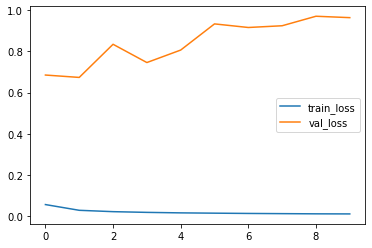

In [45]:
# Line graph between train_loss and val_loss.
import matplotlib.pyplot as plt
plt.plot(tl, label = "train_loss")
plt.plot(cvl, label = "val_loss")
plt.legend()

**Testing the model**

In [46]:
y_test_pred = model.evaluate(x_test, y_test)

550/550 [==============================] - 7s 12ms/step - loss: 0.2032 - accuracy: 0.7479


In [47]:
y_test_pred

[0.20316478610038757, 0.7478944063186646]

**Creating the VGG16 Model**

In [38]:
from keras.applications.vgg16 import VGG16
base_model=VGG16(include_top=False,input_shape=(50,50,3))
base_model.trainable=False

In [41]:
classifier=keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(38,activation='softmax'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 38)                19494     
                                                                 
Total params: 14,734,182
Trainable params: 19,494
Non-trainable params: 14,714,688
_________________________________________________________________


**Compiling vgg16 model**

In [42]:
classifier.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Fitting vgg16 model**

In [43]:
history = classifier.fit(x_train, y_train, epochs = 10, batch_size = 10, validation_split = 0.25)

Epoch 1/10
5273/5273 [==============================] - 992s 179ms/step - loss: 1.2307 - accuracy: 0.6612 - val_loss: 12.4738 - val_accuracy: 0.0258
Epoch 2/10
5273/5273 [==============================] - 935s 177ms/step - loss: 0.7356 - accuracy: 0.7839 - val_loss: 15.1577 - val_accuracy: 0.0302
Epoch 3/10
5273/5273 [==============================] - 930s 176ms/step - loss: 0.6249 - accuracy: 0.8109 - val_loss: 17.5598 - val_accuracy: 0.0323
Epoch 4/10
5273/5273 [==============================] - 937s 178ms/step - loss: 0.5659 - accuracy: 0.8265 - val_loss: 19.7219 - val_accuracy: 0.0270
Epoch 5/10
5273/5273 [==============================] - 938s 178ms/step - loss: 0.5290 - accuracy: 0.8353 - val_loss: 21.0870 - val_accuracy: 0.0353
Epoch 6/10
5273/5273 [==============================] - 947s 180ms/step - loss: 0.5008 - accuracy: 0.8433 - val_loss: 21.8334 - val_accuracy: 0.0349
Epoch 7/10
5273/5273 [==============================] - 983s 186ms/step - loss: 0.4802 - accuracy: 0.8485 

In [44]:
save_vgg=pd.DataFrame(history.history)
save_vgg

loss  accuracy   val_loss  val_accuracy
0  1.230707  0.661160  12.473791      0.025777
1  0.735617  0.783900  15.157657      0.030158
2  0.624911  0.810948  17.559757      0.032264
3  0.565945  0.826483  19.721945      0.026972
4  0.529010  0.835265  21.086996      0.035336
5  0.500840  0.843269  21.833416      0.034938
6  0.480190  0.848523  22.248144      0.039490
7  0.463423  0.854574  22.453335      0.033231
8  0.449591  0.856755  22.667973      0.044327
9  0.438136  0.860075  22.728289      0.039490

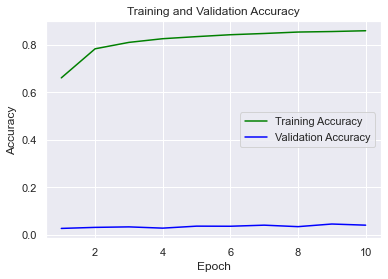

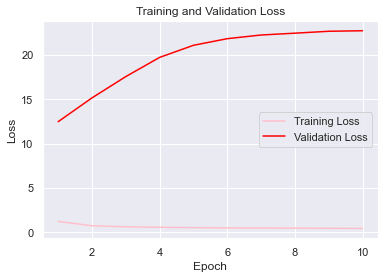

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Testing vgg16 model**

In [46]:
y_test_pred1 = classifier.predict(x_test)
y_test_pred1

550/550 [==============================] - 224s 393ms/step


array([[1.8970738e-01, 1.6367929e-03, 3.3259490e-03, ..., 2.3483273e-11,
        6.9213905e-11, 4.0802306e-11],
       [5.9430975e-01, 5.5162665e-02, 1.9225826e-02, ..., 6.3005920e-11,
        6.6185737e-11, 5.6618033e-11],
       [5.0130689e-01, 2.0419145e-02, 7.3955052e-02, ..., 2.5721708e-10,
        3.1533295e-10, 3.8000372e-10],
       ...,
       [4.8508644e-03, 1.9684832e-03, 8.2876906e-03, ..., 2.3255503e-11,
        1.6511110e-11, 2.1643834e-11],
       [5.6100953e-02, 5.0021248e-04, 4.8406240e-01, ..., 4.8191373e-10,
        3.4452977e-10, 3.1092029e-10],
       [1.0324023e-03, 2.6615759e-04, 8.9828022e-02, ..., 8.2130469e-11,
        5.9219796e-11, 6.5064537e-11]], dtype=float32)

In [56]:
y_pred_class=[np.argmax(i) for i in y_test_pred1] 

In [57]:
y_pred_class

[16,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 26,
 0,
 0,
 25,
 0,
 0,
 0,
 0,
 0,
 16,
 0,
 0,
 21,
 0,
 28,
 2,
 0,
 0,
 0,
 0,
 0,
 20,
 0,
 0,
 0,
 19,
 0,
 0,
 7,
 0,
 0,
 25,
 25,
 0,
 0,
 0,
 0,
 0,
 22,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 11,
 2,
 26,
 1,
 0,
 16,
 0,
 0,
 0,
 0,
 0,
 1,
 4,
 1,
 0,
 1,
 0,
 0,
 11,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 1,
 0,
 4,
 0,
 12,
 0,
 0,
 19,
 14,
 7,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 22,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 14,
 0,
 1,
 0,
 16,
 0,
 6,
 0,
 0,
 13,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 16,
 6,
 0,
 19,
 0,
 0,
 13,
 0,
 0,
 27,
 1,
 0,
 0,
 6,
 27,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 19,
 0,
 0,
 0,
 16,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 25,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 26,
 0,
 0,
 0,
 11,
 1,
 19,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 26,
 0,
 13,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 11,
 0,
 0,
 0,
 0,
 27

In [49]:
# Saving the model.
from tensorflow.keras.models import save_model
save_model(classifier, "vgg16_model")

INFO:tensorflow:Assets written to: vgg16_model\assets


INFO:tensorflow:Assets written to: vgg16_model\assets


In [50]:
# Loading the saved model.
from tensorflow.keras.models import load_model
model_vgg = load_model('vgg16_model')

**Prediction on a new test image**

In [55]:
img = cv2.imread(r"C:\Users\mythi\DL\test\test\PotatoHealthy1.JPG")
img = cv2.resize(img,(50,50))
img = img.reshape(1,img.shape[0],img.shape[1],img.shape[2])
y_pred=classifier.predict(img)
y_pred

1/1 [==============================] - 0s 495ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0554103e-20, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [59]:
print(list(label.keys())[list(label.values()).index(y_pred_class[1])])
print(y_pred_class[1])

Apple___Apple_scab
0


**Loading Test data**

In [78]:
import glob

file_paths = glob.glob("C:/Users/mythi/DL/test/test/*.*")[:34]
test_path = list(file_paths)

print(test_path)

['C:/Users/mythi/DL/test/test\\AppleCedarRust1.JPG', 'C:/Users/mythi/DL/test/test\\AppleCedarRust2.JPG', 'C:/Users/mythi/DL/test/test\\AppleCedarRust3.JPG', 'C:/Users/mythi/DL/test/test\\AppleCedarRust4.JPG', 'C:/Users/mythi/DL/test/test\\AppleScab1.JPG', 'C:/Users/mythi/DL/test/test\\AppleScab2.JPG', 'C:/Users/mythi/DL/test/test\\AppleScab3.JPG', 'C:/Users/mythi/DL/test/test\\CornCommonRust1.JPG', 'C:/Users/mythi/DL/test/test\\CornCommonRust2.JPG', 'C:/Users/mythi/DL/test/test\\CornCommonRust3.JPG', 'C:/Users/mythi/DL/test/test\\PotatoEarlyBlight1.JPG', 'C:/Users/mythi/DL/test/test\\PotatoEarlyBlight2.JPG', 'C:/Users/mythi/DL/test/test\\PotatoEarlyBlight3.JPG', 'C:/Users/mythi/DL/test/test\\PotatoEarlyBlight4.JPG', 'C:/Users/mythi/DL/test/test\\PotatoEarlyBlight5.JPG', 'C:/Users/mythi/DL/test/test\\PotatoHealthy1.JPG', 'C:/Users/mythi/DL/test/test\\PotatoHealthy2.JPG', 'C:/Users/mythi/DL/test/test\\TomatoEarlyBlight1.JPG', 'C:/Users/mythi/DL/test/test\\TomatoEarlyBlight2.JPG', 'C:/Use

**Predicting test image through vgg16 model**

In [79]:
li_test = []
for i in test_path:
    img = cv2.imread(r"C:\Users\mythi\DL\test\test\TomatoYellowCurlVirus6.JPG")
    img = cv2.resize(img,(50,50))
    img = img.reshape(1,img.shape[0],img.shape[1],img.shape[2])
    y_pred=classifier.predict(img)
    li_test.append(y_pred)

1/1 [==============================] - 0s 44ms/step
